In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
df = pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')

In [9]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
X = df.values

In [14]:
df.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
scaler = StandardScaler()

In [16]:
X_scaled = scaler.fit_transform(X)

In [46]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

In [47]:
df['BSCAN_Cluster'] = labels

C:\Users\bhosa\AppData\Local\Temp\ipykernel_2112\3705233151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BSCAN_Cluster'] = labels


In [48]:
labels

array([-1, -1,  1,  0, -1,  0,  1, -1,  1, -1,  2, -1,  2,  0,  2,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1,  3,  3,  4,  4,  3,
        5,  3,  5,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3, -1,  3,  3,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6, -1, -1,  7, -1, -1,  8,  7,  8,  7, -1,  7,  8,  9,
        8,  7,  8,  7,  8, -1, -1,  9,  8, -1, -1,  7, 10,  9, 10,  9, 10,
        7, 10,  9, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

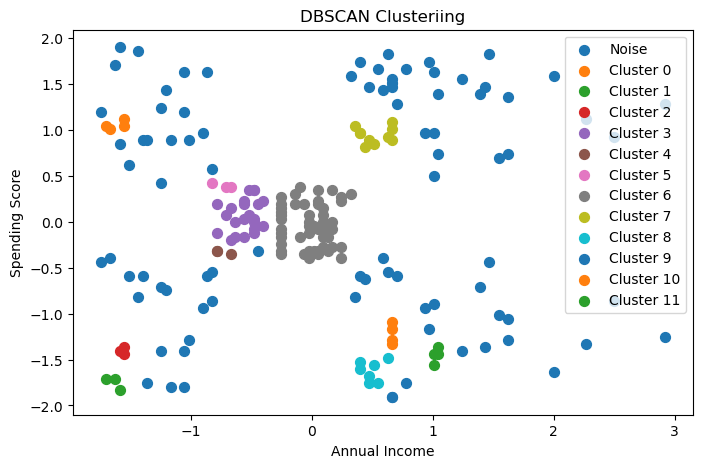

In [49]:
plt.figure(figsize=(8,5))
unique_labels = np.unique(labels)

for label in unique_labels:
    cluster_points = X_scaled[labels == label]
    if label == -1: # Noise point
        plt.scatter(cluster_points[:, 0], cluster_points[:,1], s = 50, label='Noise')
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 50, label = f'Cluster {label}')

plt.title('DBSCAN Clusteriing')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [50]:
df

,Annual Income (k$),Spending Score (1-100),BSCAN_Cluster
0,15,39,-1
1,15,81,-1
2,16,6,1
3,16,77,0
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [53]:
df[df['BSCAN_Cluster'] == 2]

,Annual Income (k$),Spending Score (1-100),BSCAN_Cluster
10,19,14,2
12,20,15,2
14,20,13,2
